We now have metrics that use the stellar luminosity function maps to compute the errors that will result from stellar crowding.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('baseline_v1.4_10yrs.db')
outDir = 'crowding_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 64

For the CrowdingMetric, one sets the acceptable magnitude uncertainty, and the metric finds the magnitude star that will have that uncertainty given the crowding.  

In [3]:
# Explicitly set which stellar density map to use
bundleList = []
filtername = 'r'
mapsList = [maps.TrilegalDensityMap(filtername=filtername, nside=nside)]
metric = metrics.CrowdingM5Metric(crowding_error=0.05, filtername=filtername, maps=[])

In [4]:
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = 'filter="%s" and night < 730' % filtername
plotDict={'colorMin':21., 'colorMax':25.}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, mapsList=mapsList)
bundleList.append(bundle)

bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['seeingFwhmGeom', 'fieldRA', 'fieldDec']
Found 85634 visits
Running:  ['opsim_Crowding_to_Precision_0_05_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
monopole: 24.5824  dipole: lon: 58.799, lat: 27.053, amp: 3.00539
Plotting complete.


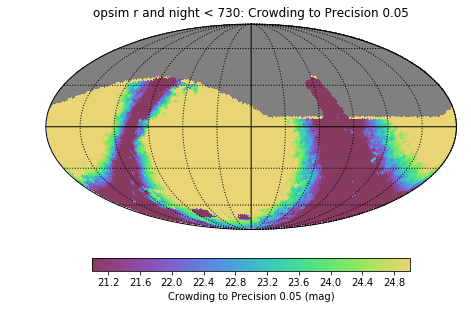

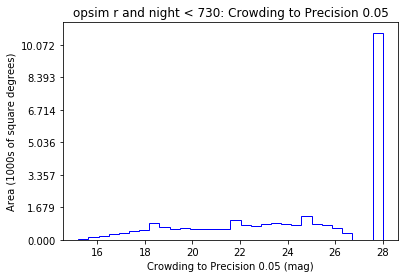

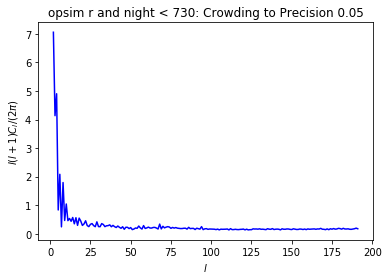

In [5]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

The second metric takes a single stellar magnitude and returns the resulting magnitude uncertainty on it, taking the standard 5-sigma depth or the crowding uncertainty, whichever is larger.

In [8]:
bundleList = []
metric = metrics.CrowdingMagUncertMetric(maps=['TrilegalDensityMap'])
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = 'filter="r" and night < 730'
plotDict={'colorMin':0., 'colorMax':0.2}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['seeingFwhmGeom', 'fieldRA', 'fieldDec']
Found 85634 visits
Running:  ['opsim_CrowdingError_at_20_00_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 343 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0476179  dipole: lon: -106.358, lat: -11.7758, amp: 0.0330943
Plotting complete.


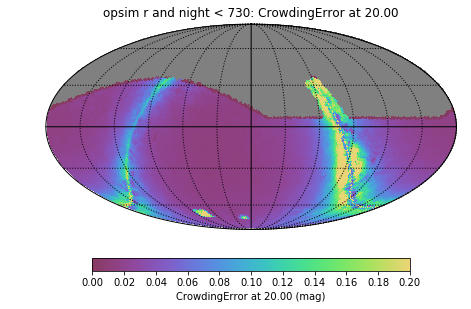

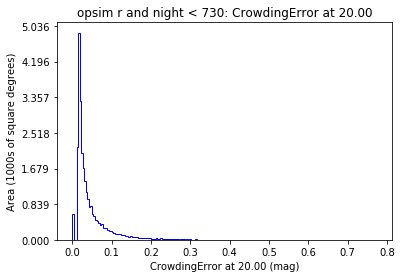

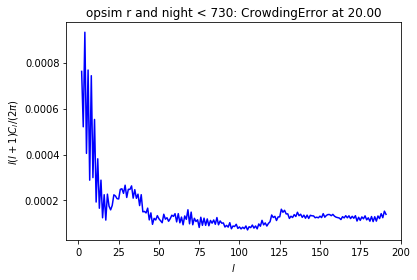

In [9]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)